Name: Tanvish Deherkar
Student Id: 24237559

**Easy**

following code is for 20.png, 29.png and easy.jpg

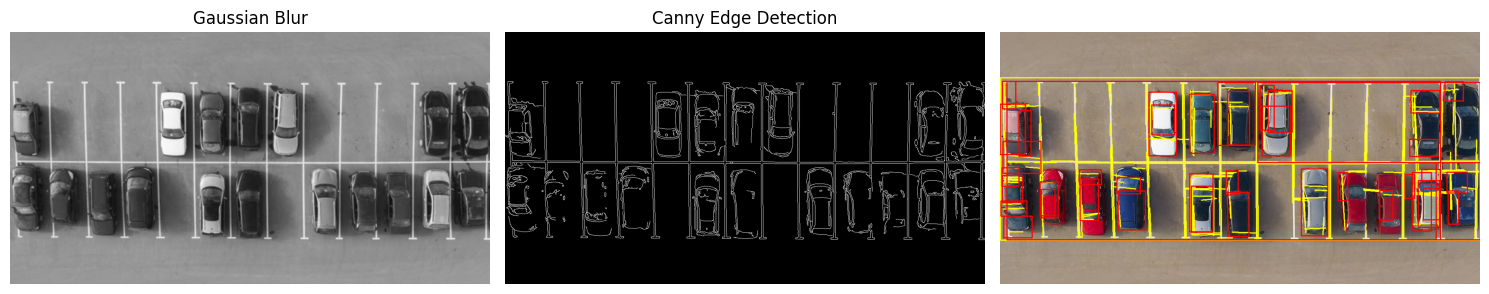

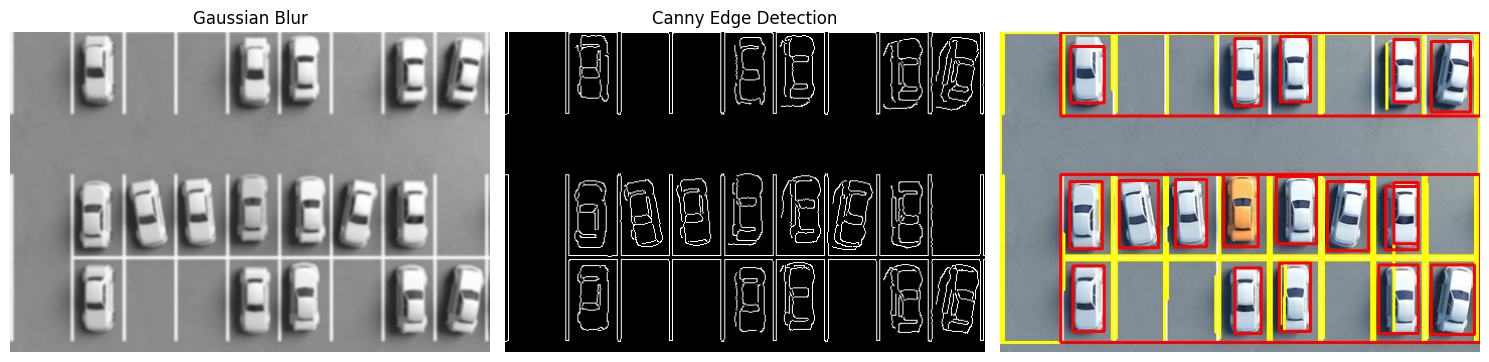

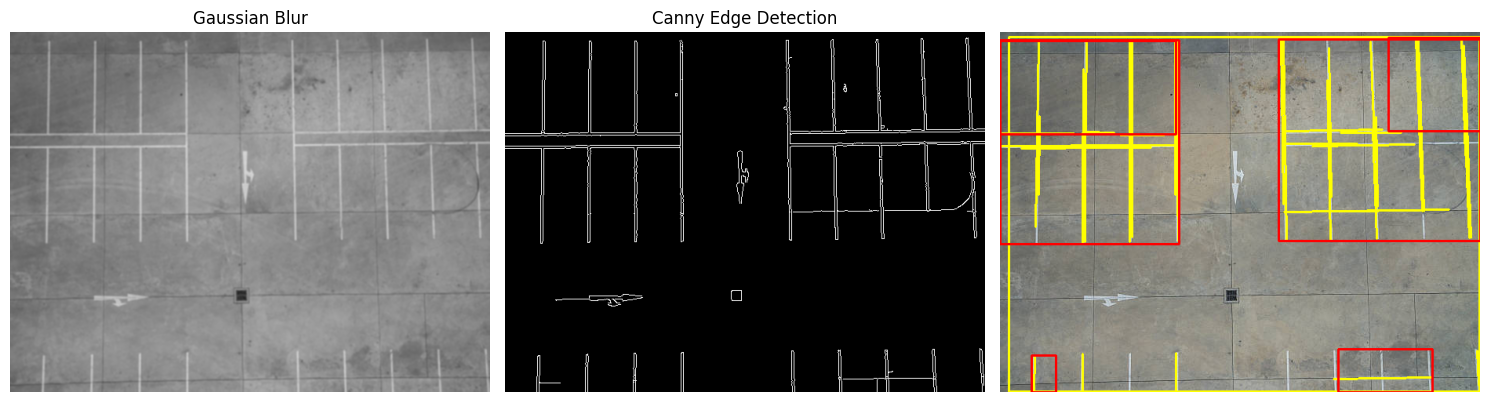

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List of image paths
image_paths = [
    '20.png',
    '29.png',
    'easy.jpg',
]

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

def detect_edges(blurred):

    canny_low_threshold = 45
    canny_high_threshold = 190
    edges = cv2.Canny(blurred, canny_low_threshold, canny_high_threshold)
    return edges

def harris_corner_detection(image):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float32)
    # Apply Harris corner detection
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    return dst

def detect_lines_and_boxes(image, edges):
    final_image = image.copy()

    #Detect lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=80, minLineLength=30, maxLineGap=20)
    hough_regions = []

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(final_image, (x1, y1), (x2, y2), (0, 255, 255), 2)


            hough_regions.append((x1, y1, x2, y2))

    #Harris corner detection
    corner_response = harris_corner_detection(image)

    # Threshold for corner response
    corner_threshold = 0.01 * corner_response.max()
    corners = np.argwhere(corner_response > corner_threshold)

    #Find the bounding box around the detected corners
    if len(corners) > 0:
        top_left = np.min(corners, axis=0)
        bottom_right = np.max(corners, axis=0)

        cv2.rectangle(final_image, tuple(top_left[::-1]), tuple(bottom_right[::-1]), (0, 255, 255), 2)  # Yellow box

    #Find contours and draw red bounding boxes
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        # Only draw boxes that are large enough
        if w > 23 and h > 30:
            cv2.rectangle(final_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    return final_image

# Process each image in the list
for image_path in image_paths:
    # Load the image
    image = cv2.imread(image_path)

    # Preprocess the image
    blurred = preprocess_image(image)

    # Detect edges
    edges = detect_edges(blurred)

    # Detect lines and add filtered bounding boxes
    final_image = detect_lines_and_boxes(image, edges)


    plt.figure(figsize=(15, 5))

    # Canny Edge Detection
    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis('off')


    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))

    plt.axis('off')


    plt.tight_layout()
    plt.show()




For the image not_that_easy.jpg

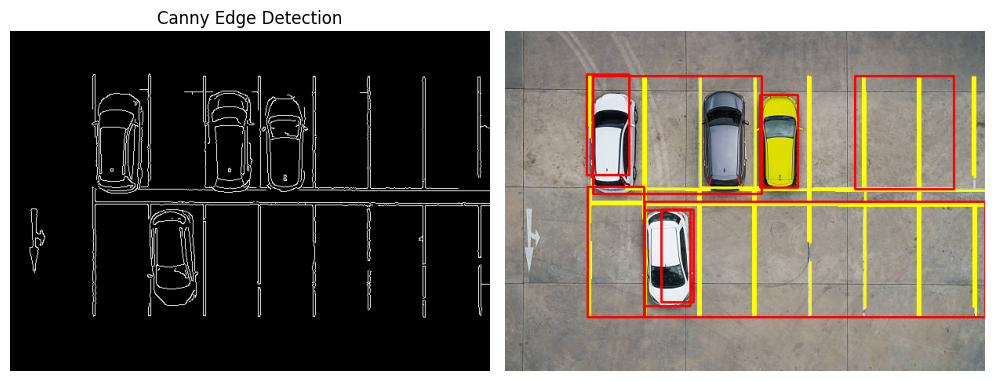

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List of image paths
image_paths = [
    'not_that_easy.jpg'
]

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

def detect_edges(blurred):
    canny_low_threshold = 90
    canny_high_threshold = 200
    edges = cv2.Canny(blurred, canny_low_threshold, canny_high_threshold)
    return edges

def detect_lines_and_boxes(image, edges):
    final_image = image.copy()
    #Detect lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=80, minLineLength=30, maxLineGap=20)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(final_image, (x1, y1), (x2, y2), (0, 255, 255), 2)
    #Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #Draw red bounding boxes around each contour
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        # Only draw boxes that are large enough (to filter small noise)
        if w > 40 and h > 115:
            cv2.rectangle(final_image, (x, y), (x + w, y + h), (0, 0, 255), 2)
    return final_image

# Process each image in the list
for image_path in image_paths:
    image = cv2.imread(image_path)
    blurred = preprocess_image(image)
    edges = detect_edges(blurred)
    final_image = detect_lines_and_boxes(image, edges)

    plt.figure(figsize=(15, 5))

    # Canny Edge Detection
    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()

**Medium**



Following is the code for image 31.png and 30.png (use  if w > 33 and h > 25: for the counters to run 30.png)


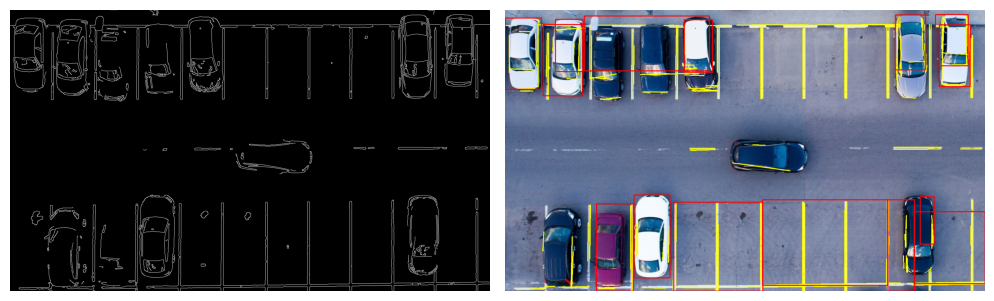

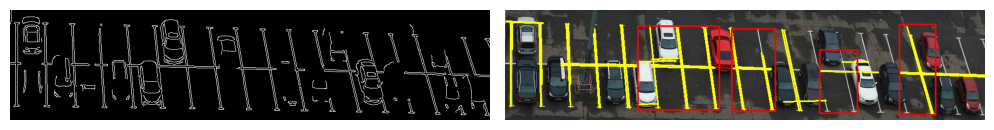

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List of image paths
image_paths = [
    '31.png',
    '30.png'
]

def preprocess_image(image):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

def detect_edges(blurred):
    canny_low_threshold = 90
    canny_high_threshold = 200
    edges = cv2.Canny(blurred, canny_low_threshold, canny_high_threshold)
    return edges

def detect_lines_and_boxes(image, edges):
    final_image = image.copy()

    #Detect lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=80, minLineLength=30, maxLineGap=20)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(final_image, (x1, y1), (x2, y2), (0, 255, 255), 2)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # red bounding boxes around each contour
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        # Only draw boxes that are large enough (to filter small noise)
        # use  if w > 33 and h > 25: to run 30.png
        if w > 40 and h > 115:
           cv2.rectangle(final_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    return final_image

# Process each image in the list
for image_path in image_paths:
    image = cv2.imread(image_path)
    blurred = preprocess_image(image)

    # Detect edges
    edges = detect_edges(blurred)

    # Detect lines and add filtered bounding boxes
    final_image = detect_lines_and_boxes(image, edges)

    plt.figure(figsize=(15, 5))

    # Canny Edge Detection
    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')


    plt.tight_layout()
    plt.show()

Following is the code for image 12.png

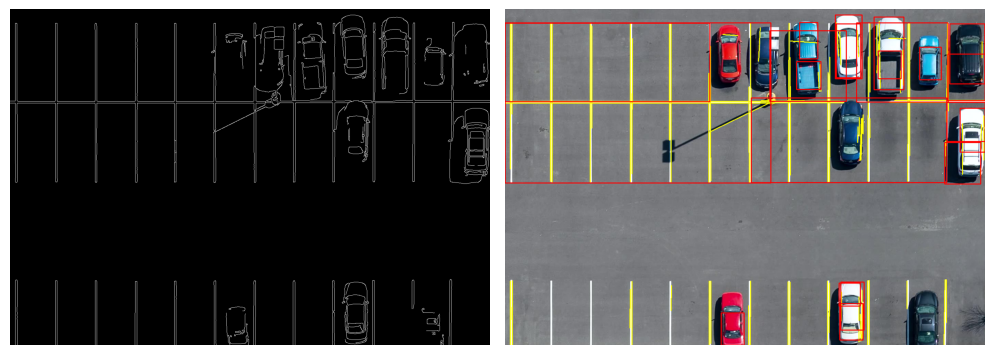

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List of image paths
image_paths = [
    '12.png'
]

#ROI (x, y, width, height)
roi_x, roi_y, roi_w, roi_h = 300, 100, 1400, 1100

def preprocess_image(image, roi=None):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    if roi:
        blurred = blurred[roi_y:roi_y+roi_h, roi_x:roi_x+roi_w]

    return blurred

def detect_edges(blurred):
    canny_low_threshold = 50
    canny_high_threshold = 400
    edges = cv2.Canny(blurred, canny_low_threshold, canny_high_threshold)
    return edges

def detect_lines_and_boxes(image, edges, roi=None):
    final_image = image.copy()

    if roi:
        final_image = final_image[roi_y:roi_y+roi_h, roi_x:roi_x+roi_w]

    # Detect lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=80, minLineLength=30, maxLineGap=20)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(final_image, (x1, y1), (x2, y2), (0, 255, 255), 2)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw red bounding boxes around each contour
    for contour in contours:
        # Calculate the bounding box for each contour
        x, y, w, h = cv2.boundingRect(contour)

        # Only draw boxes that are large enough (to filter small noise)
        if w > 50 and h > 60:
            cv2.rectangle(final_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    return final_image

# Process each image in the list
for image_path in image_paths:
    image = cv2.imread(image_path)

    blurred = preprocess_image(image, roi=(roi_x, roi_y, roi_w, roi_h))

    # Detect edges
    edges = detect_edges(blurred)

    # Apply line and box detection
    final_image = detect_lines_and_boxes(image, edges, roi=(roi_x, roi_y, roi_w, roi_h))

    plt.figure(figsize=(15, 5))

    # Canny Edge Detection
    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')


    plt.tight_layout()
    plt.show()



Hard

Following is the code for 21.png and frame600.jpg (use canny_high_threshold = 300 and w > 50 and h > 50: )

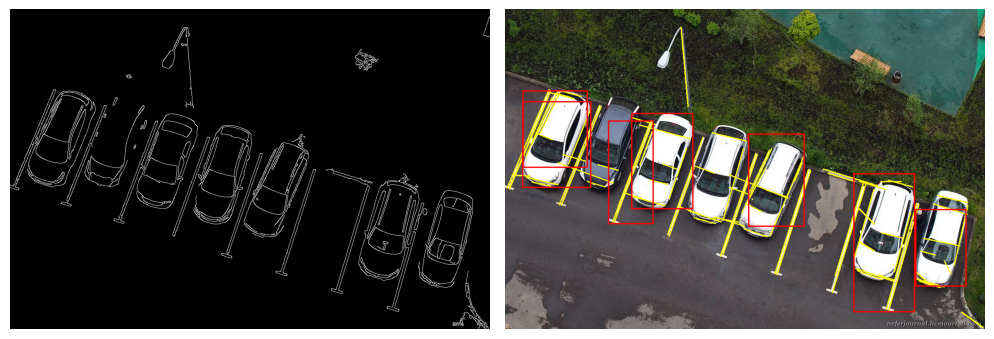

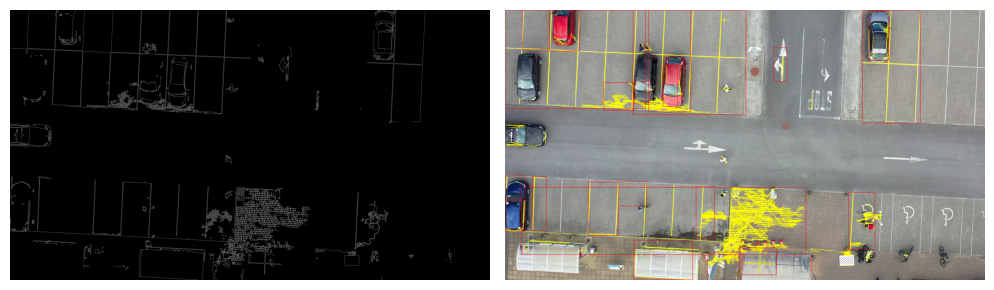

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List of image paths
image_paths = [
    '21.png',
    'frame600.jpg'
]

def preprocess_image(image):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

def detect_edges(blurred):
    canny_low_threshold = 40
    canny_high_threshold = 400   #use 300 f0r frame600.jpg
    edges = cv2.Canny(blurred, canny_low_threshold, canny_high_threshold)
    return edges

def detect_lines_and_boxes(image, edges):
    final_image = image.copy()

    #Detect lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=80, minLineLength=30, maxLineGap=20)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(final_image, (x1, y1), (x2, y2), (0, 255, 255), 2)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # red bounding boxes around each contour
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        # Only draw boxes that are large enough (to filter small noise)
        if w > 95 and h > 150: # use if w > 50 and h > 50: for frame600.jpg
           cv2.rectangle(final_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    return final_image

# Process each image in the list
for image_path in image_paths:
    image = cv2.imread(image_path)
    blurred = preprocess_image(image)

    # Detect edges
    edges = detect_edges(blurred)

    # Detect lines and add filtered bounding boxes
    final_image = detect_lines_and_boxes(image, edges)

    plt.figure(figsize=(15, 5))

    # Canny Edge Detection
    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')


    plt.tight_layout()
    plt.show()


Frame1.jpg

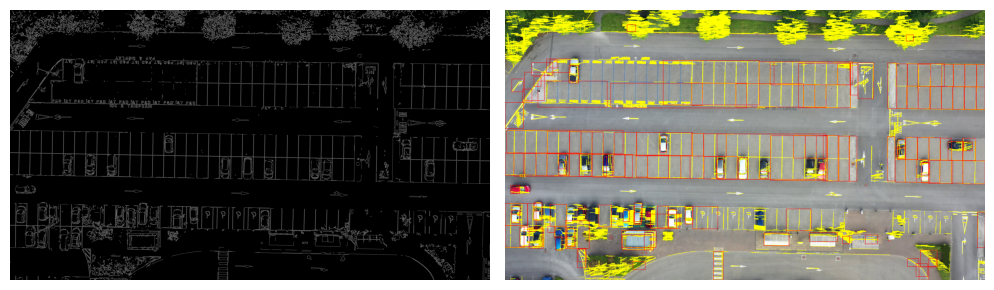

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List of image paths
image_paths = [
    'frame1.jpg'
]

def preprocess_image(image):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

def detect_edges(blurred):
    canny_low_threshold = 90
    canny_high_threshold = 150
    edges = cv2.Canny(blurred, canny_low_threshold, canny_high_threshold)
    return edges

def detect_lines_and_boxes(image, edges):
    final_image = image.copy()

    #Detect lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=80, minLineLength=30, maxLineGap=20)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(final_image, (x1, y1), (x2, y2), (0, 255, 255), 2)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # red bounding boxes around each contour
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        # Only draw boxes that are large enough (to filter small noise)
        # use  if w > 33 and h > 25: to run 30.png
        if w > 50 and h > 50:
           cv2.rectangle(final_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    return final_image

# Process each image in the list
for image_path in image_paths:
    image = cv2.imread(image_path)
    blurred = preprocess_image(image)

    # Detect edges
    edges = detect_edges(blurred)

    # Detect lines and add filtered bounding boxes
    final_image = detect_lines_and_boxes(image, edges)

    plt.figure(figsize=(15, 5))

    # Canny Edge Detection
    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')


    plt.tight_layout()
    plt.show()
